In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
data=yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [3]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ##
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=16)               ## 
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ## 
#############################################

In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900
2023-06-15,183.960007,186.520004,183.779999,186.009995,186.009995,65433200


In [5]:
df=data["Adj Close"]
df=pd.DataFrame(df)
df

,Adj Close
Date,
1980-12-12,0.099584
1980-12-15,0.094388
1980-12-16,0.087461
1980-12-17,0.089625
1980-12-18,0.092224
...,...
2023-06-13,183.309998
2023-06-14,183.949997
2023-06-15,186.009995


In [6]:
df.isna().sum()

Adj Close    0
dtype: int64

<Axes: xlabel='Date'>

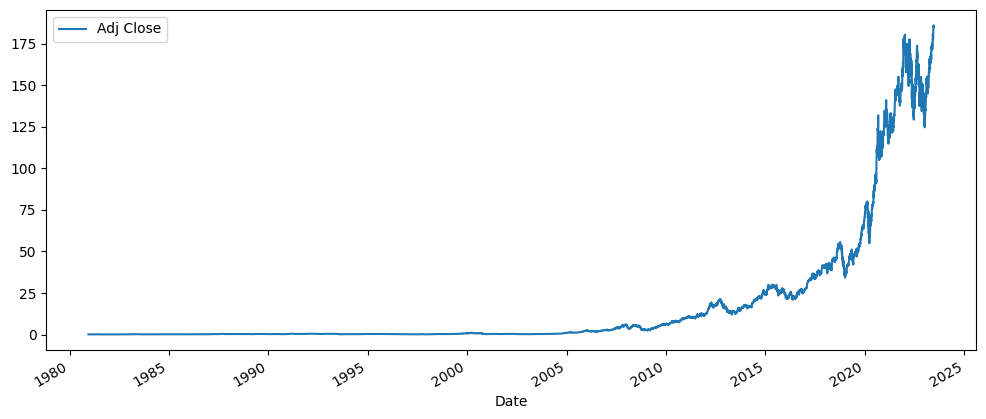

In [7]:
df.plot()

<Axes: ylabel='Frequency'>

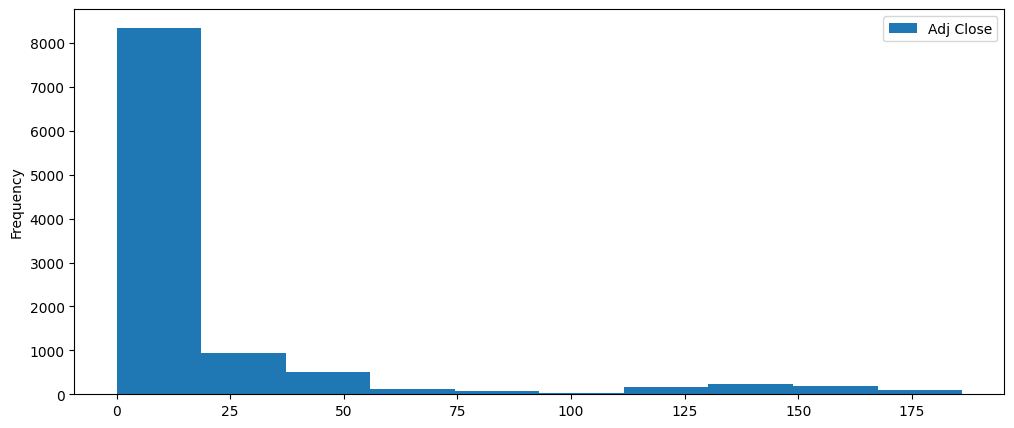

In [8]:
df.plot(kind='hist')

In [9]:
df=df["2005-01-01":]
df

,Adj Close
Date,
2005-01-03,0.960588
2005-01-04,0.970453
2005-01-05,0.978952
2005-01-06,0.979712
2005-01-07,1.051045
...,...
2023-06-13,183.309998
2023-06-14,183.949997
2023-06-15,186.009995


In [10]:
df_non_idx=df.copy().reset_index()

In [11]:
df.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-20'],
              dtype='datetime64[ns]', name='Date', length=4647, freq=None)

In [12]:
df_decomposed = seasonal_decompose(df,model='additive',period=1)


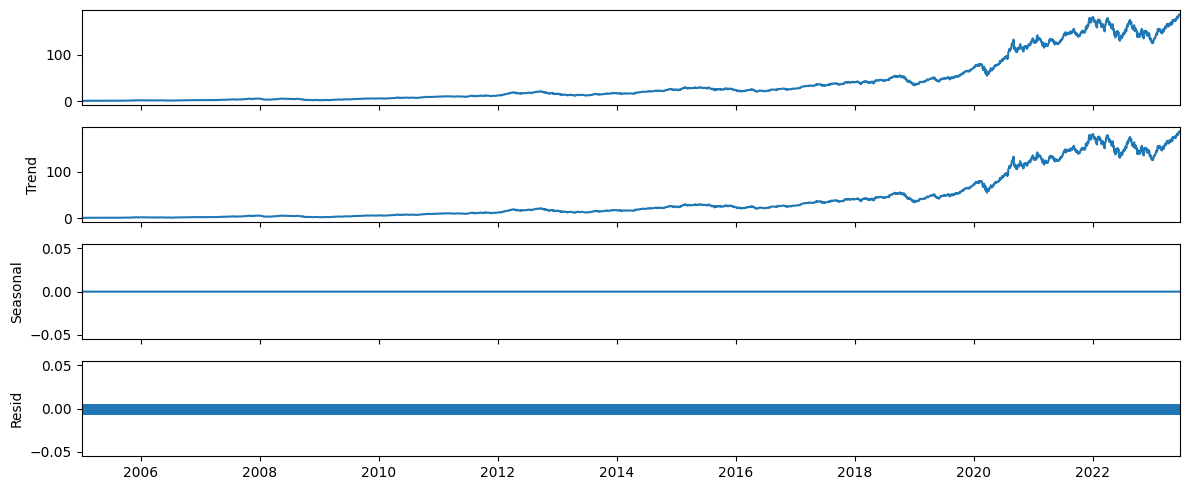

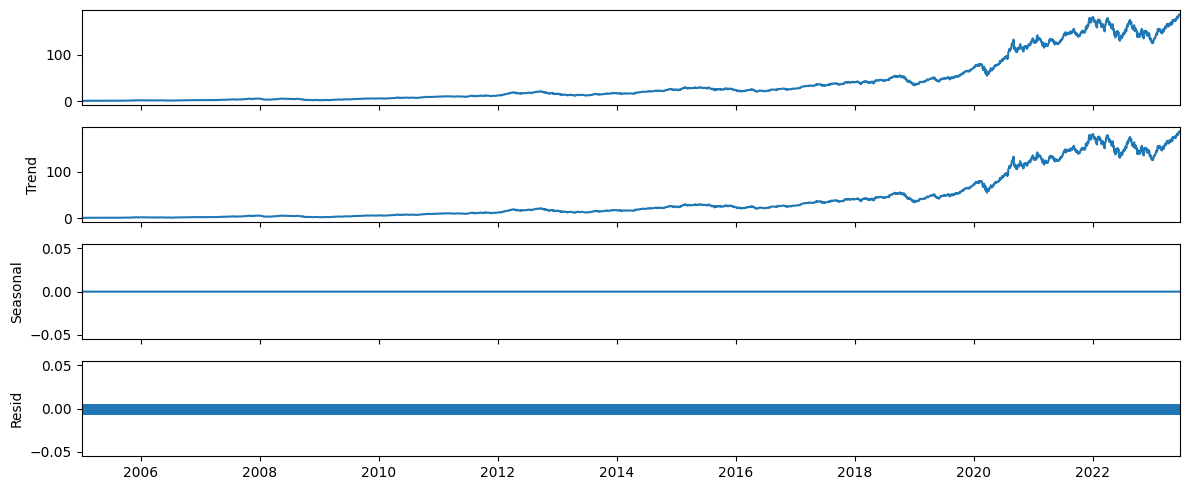

In [13]:
df_decomposed.plot()

In [14]:
df_non_idx["Year"]=df_non_idx.Date.dt.year

<Axes: xlabel='Year', ylabel='Adj Close'>

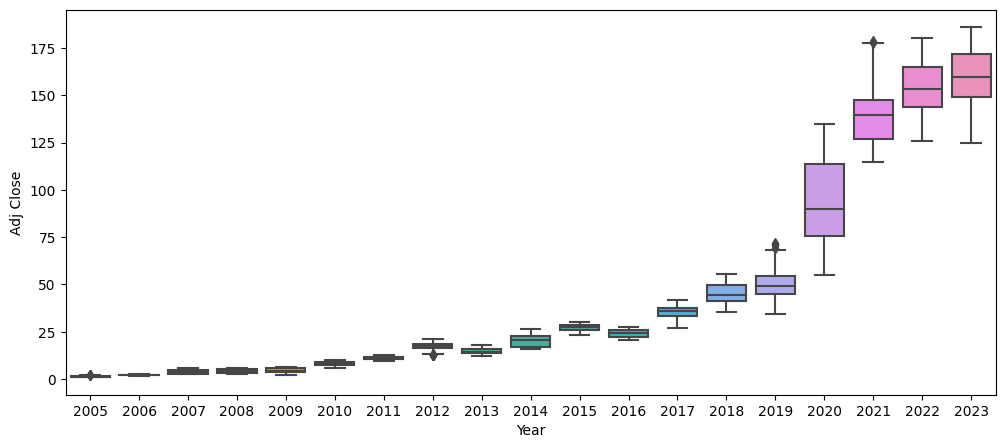

In [15]:
sns.boxplot(x=df_non_idx["Year"],y=df_non_idx["Adj Close"])

In [16]:
df_10=df["2010-01-01":"2020-12-31"]
df_20=df["2020-01-01":]


In [17]:
df_10

,Adj Close
Date,
2010-01-04,6.496296
2010-01-05,6.507526
2010-01-06,6.404016
2010-01-07,6.392176
2010-01-08,6.434674
...,...
2020-12-24,130.025894
2020-12-28,134.676392
2020-12-29,132.883194


In [18]:
df_20

,Adj Close
Date,
2020-01-02,73.347939
2020-01-03,72.634842
2020-01-06,73.213608
2020-01-07,72.869293
2020-01-08,74.041481
...,...
2023-06-13,183.309998
2023-06-14,183.949997
2023-06-15,186.009995


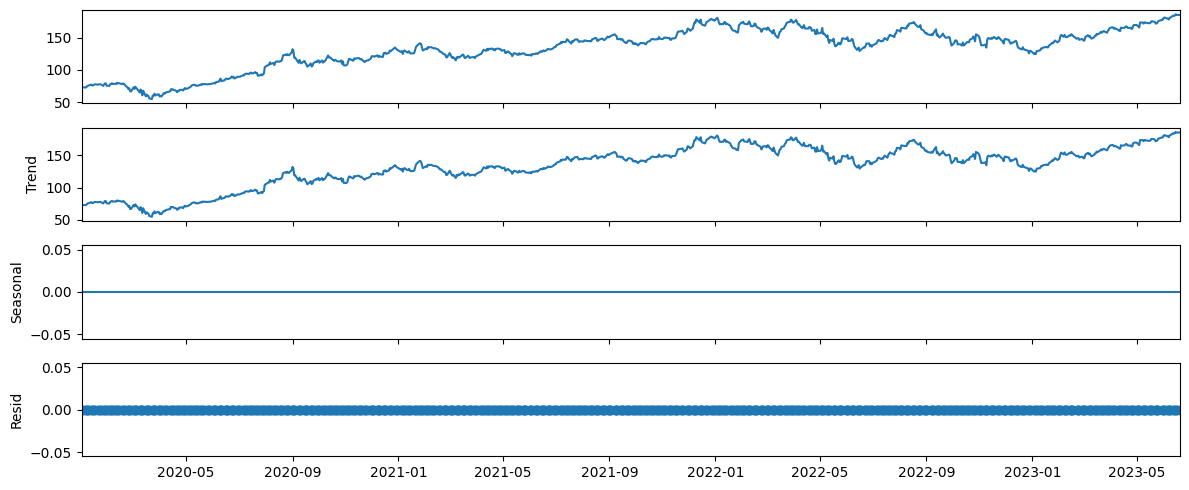

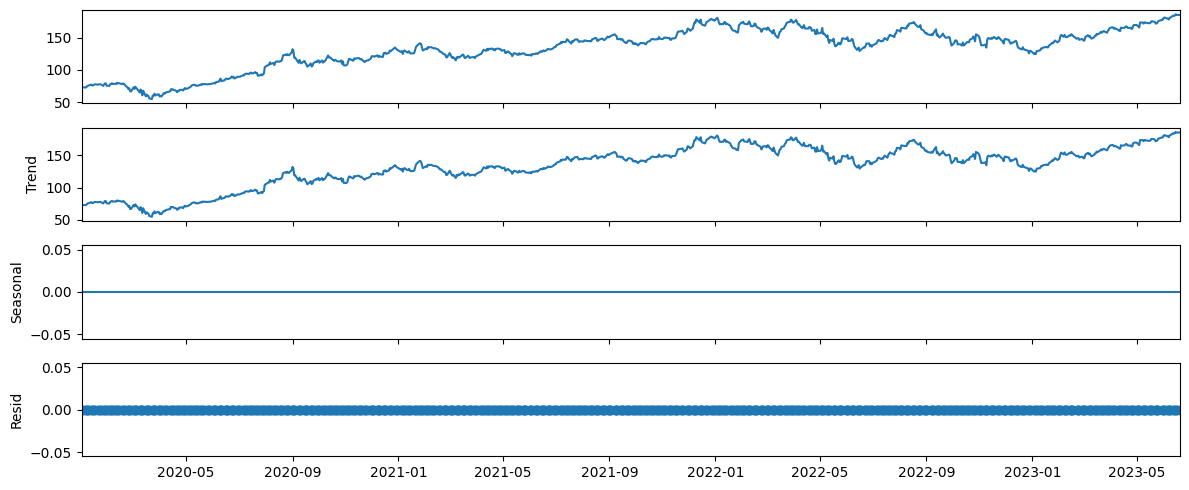

In [19]:
df_20_decomposed = seasonal_decompose(df_20,model='additive',period=1)
df_20_decomposed.plot()

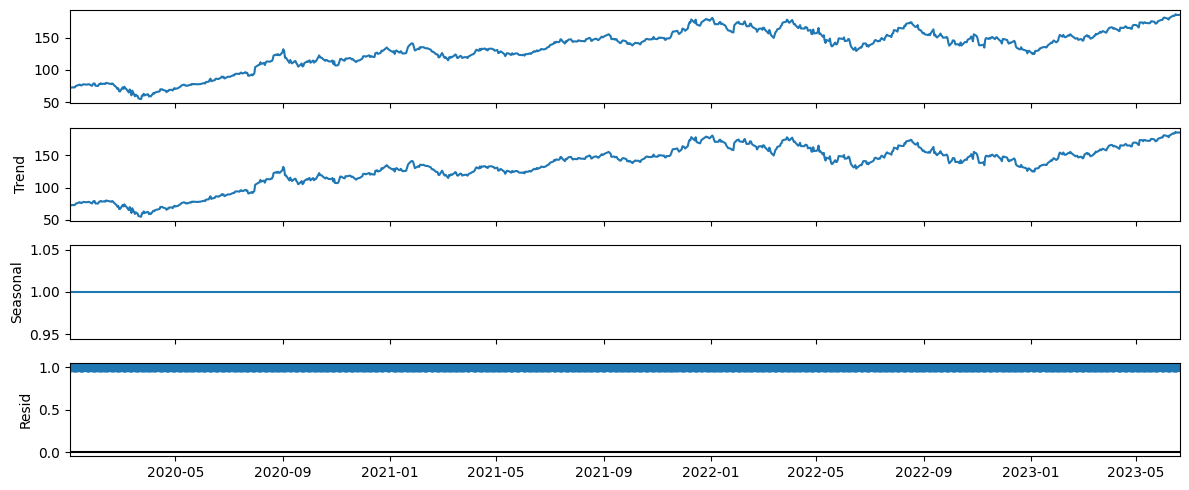

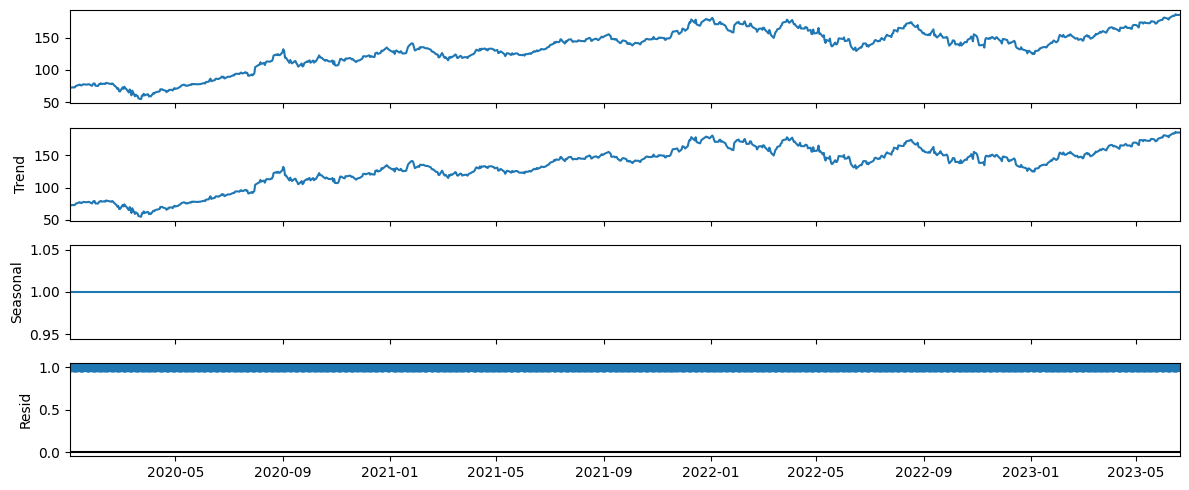

In [20]:
df_20_decomposed = seasonal_decompose(df_20,model='multiplicative',period=1)
df_20_decomposed.plot()

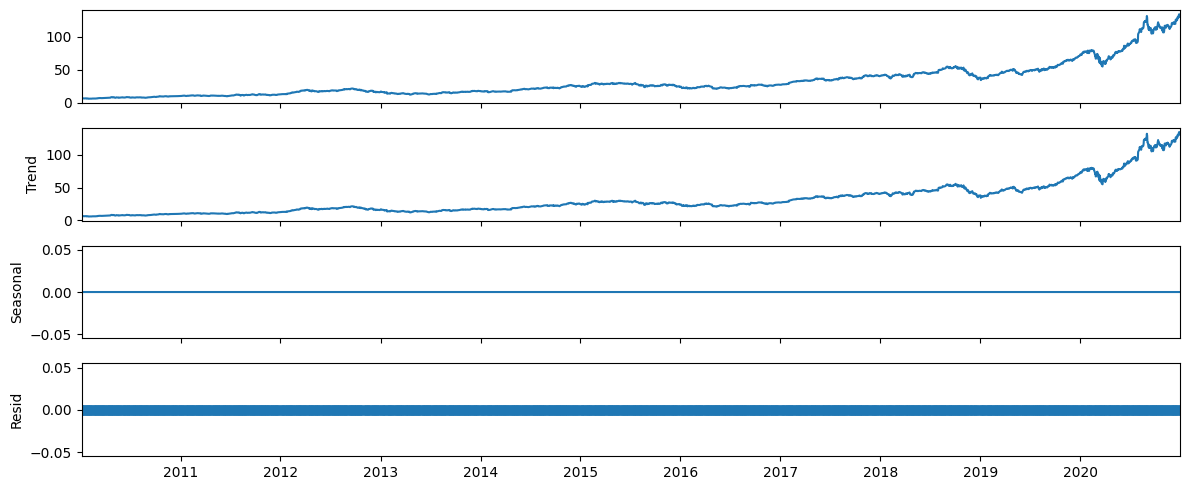

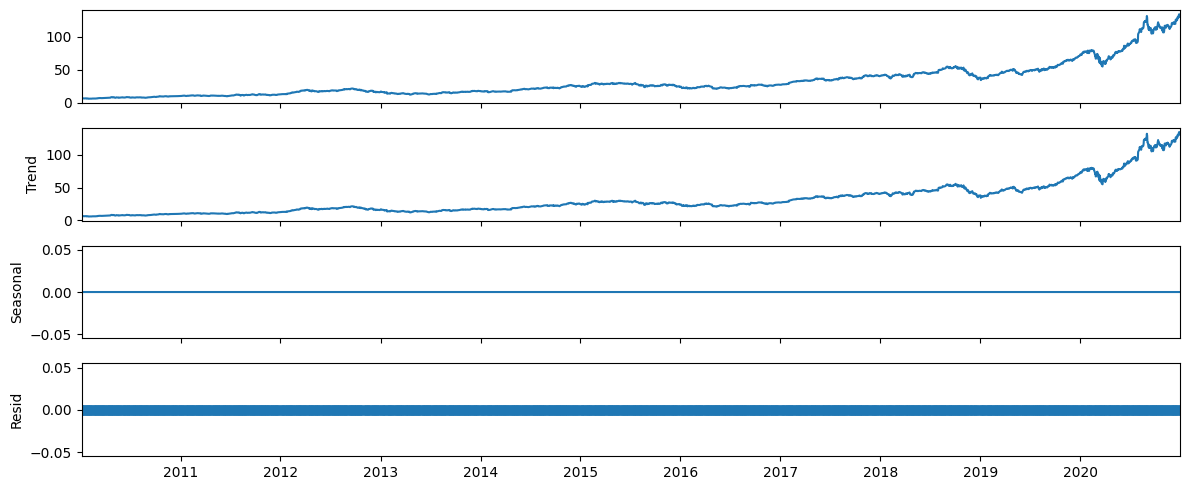

In [21]:
df_10_decomposed = seasonal_decompose(df_10,model='additive',period=1)
df_10_decomposed.plot()

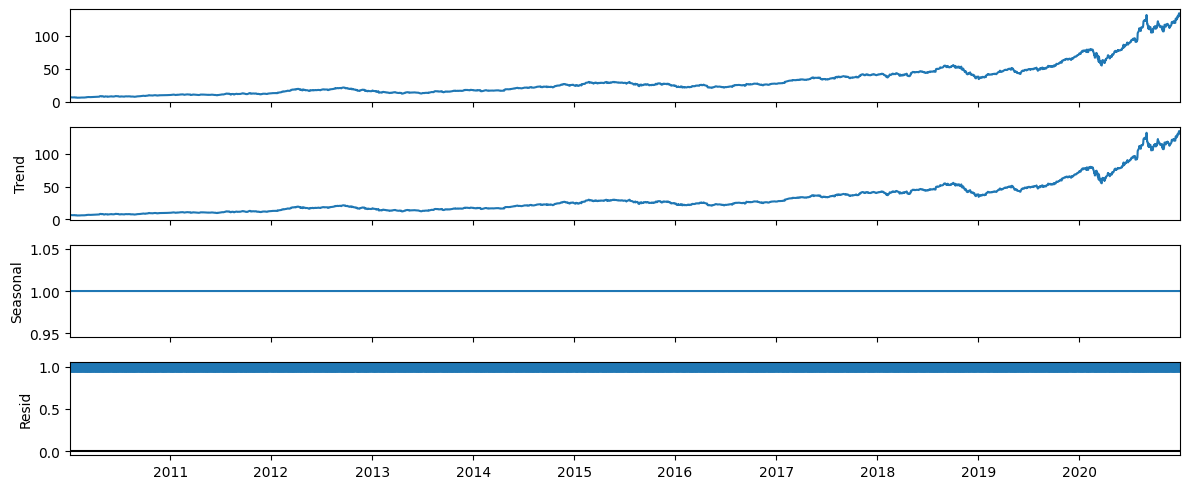

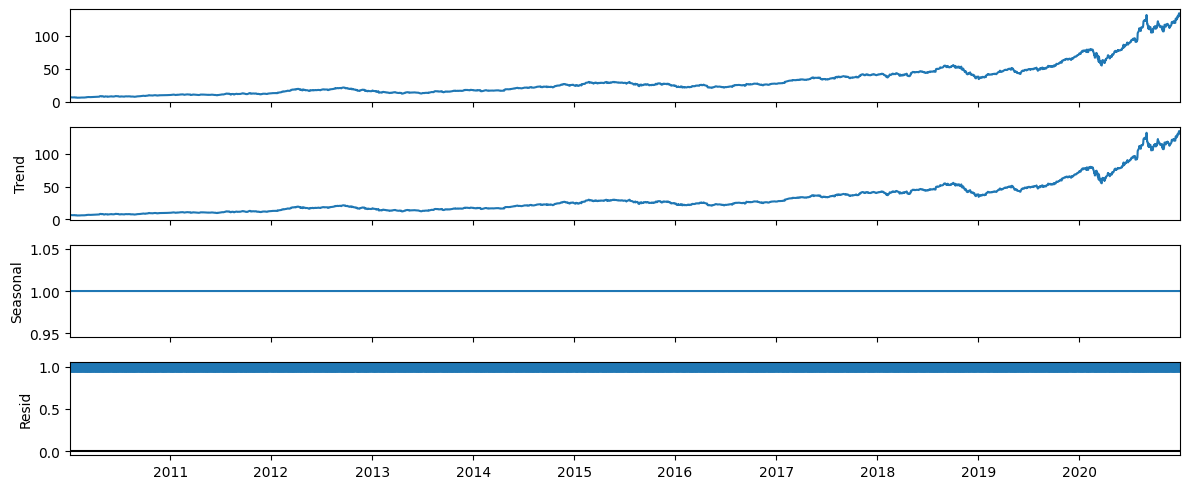

In [22]:
df_10_decomposed = seasonal_decompose(df_10,model='multiplicative',period=1)
df_10_decomposed.plot()

**Results**:
As we can see, for both models the seasonal plot is showing straight line emply that there is no **Seasonality**.
And from trend plots, there is no such **Upward Trend** is observed.Thus our TS data is **Non stationary**.

## hp filter

In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [24]:
hpfilter(df_20)

(Date
 2020-01-02   -0.137349
 2020-01-03   -1.189408
 2020-01-06   -0.949520
 2020-01-07   -1.631796
 2020-01-08   -0.795233
                 ...   
 2023-06-13    0.418448
 2023-06-14    0.422970
 2023-06-15    1.846979
 2023-06-16    0.121448
 2023-06-20   -0.423826
 Name: cycle, Length: 872, dtype: float64,
 Date
 2020-01-02     73.485287
 2020-01-03     73.824250
 2020-01-06     74.163127
 2020-01-07     74.501090
 2020-01-08     74.836714
                  ...    
 2023-06-13    182.891550
 2023-06-14    183.527027
 2023-06-15    184.163016
 2023-06-16    184.798550
 2023-06-20    185.433820
 Name: trend, Length: 872, dtype: float64)

In [25]:
df_20_cyclic, df_20_trend = hpfilter(df_20)

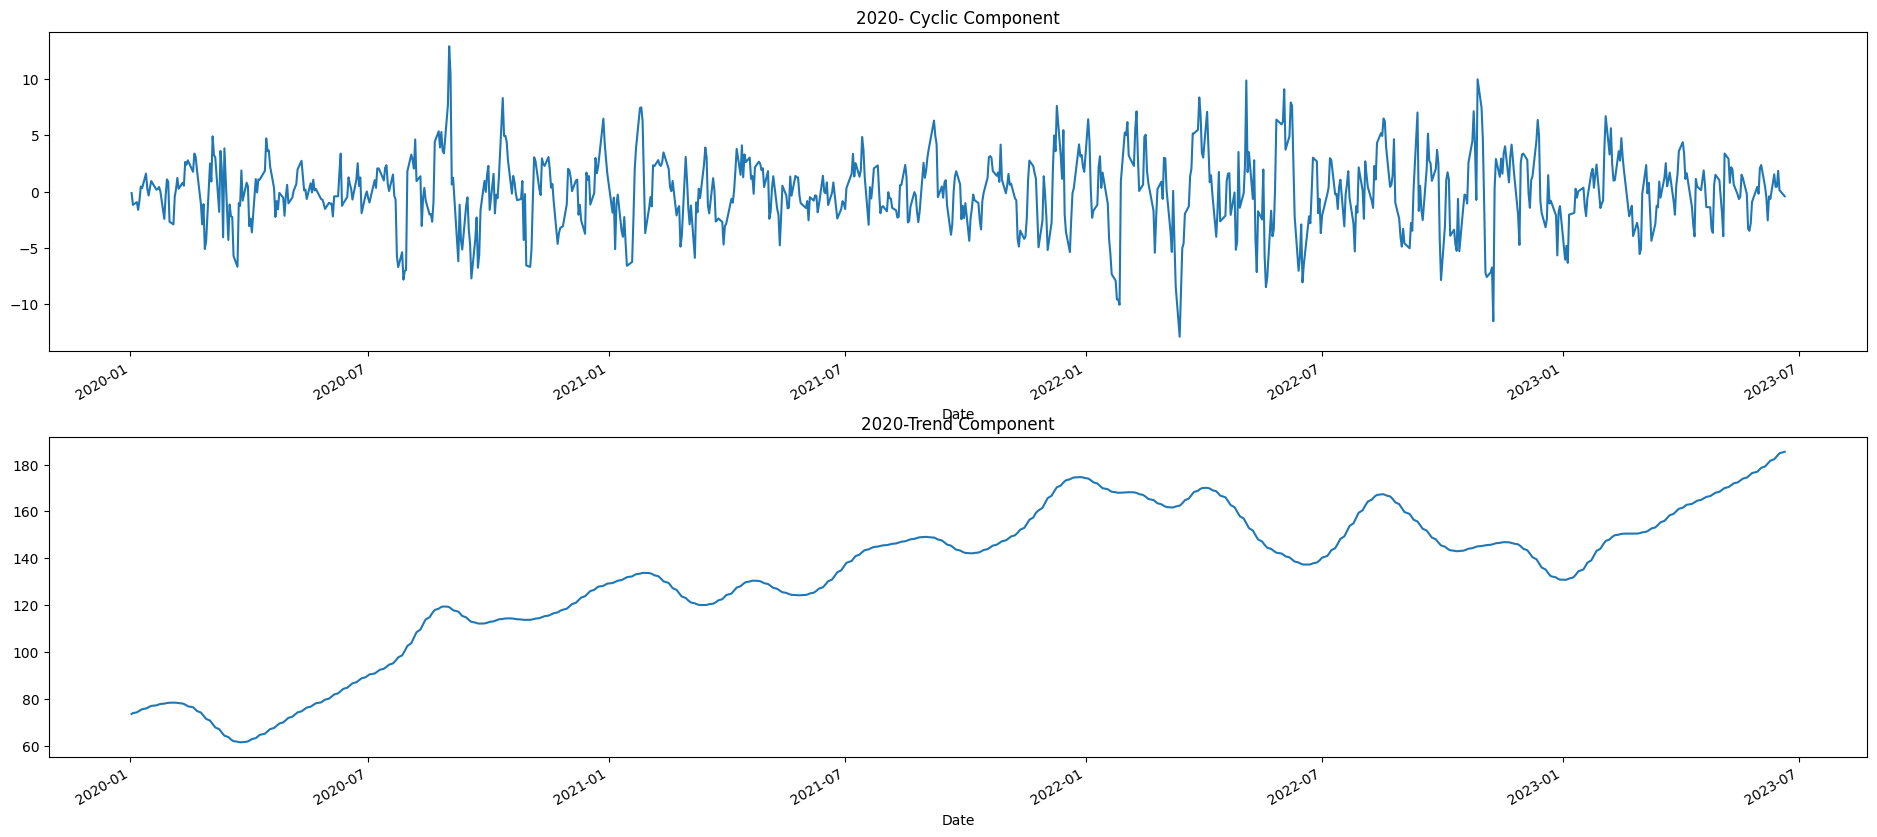

In [26]:
fig,ax=plt.subplots(2,1,figsize=(20, 10))
fig.tight_layout(pad=5.0)
df_20_cyclic.plot(ax=ax[0],title='2020- Cyclic Component')
df_20_trend.plot(ax=ax[1],title="2020-Trend Component")
plt.show()

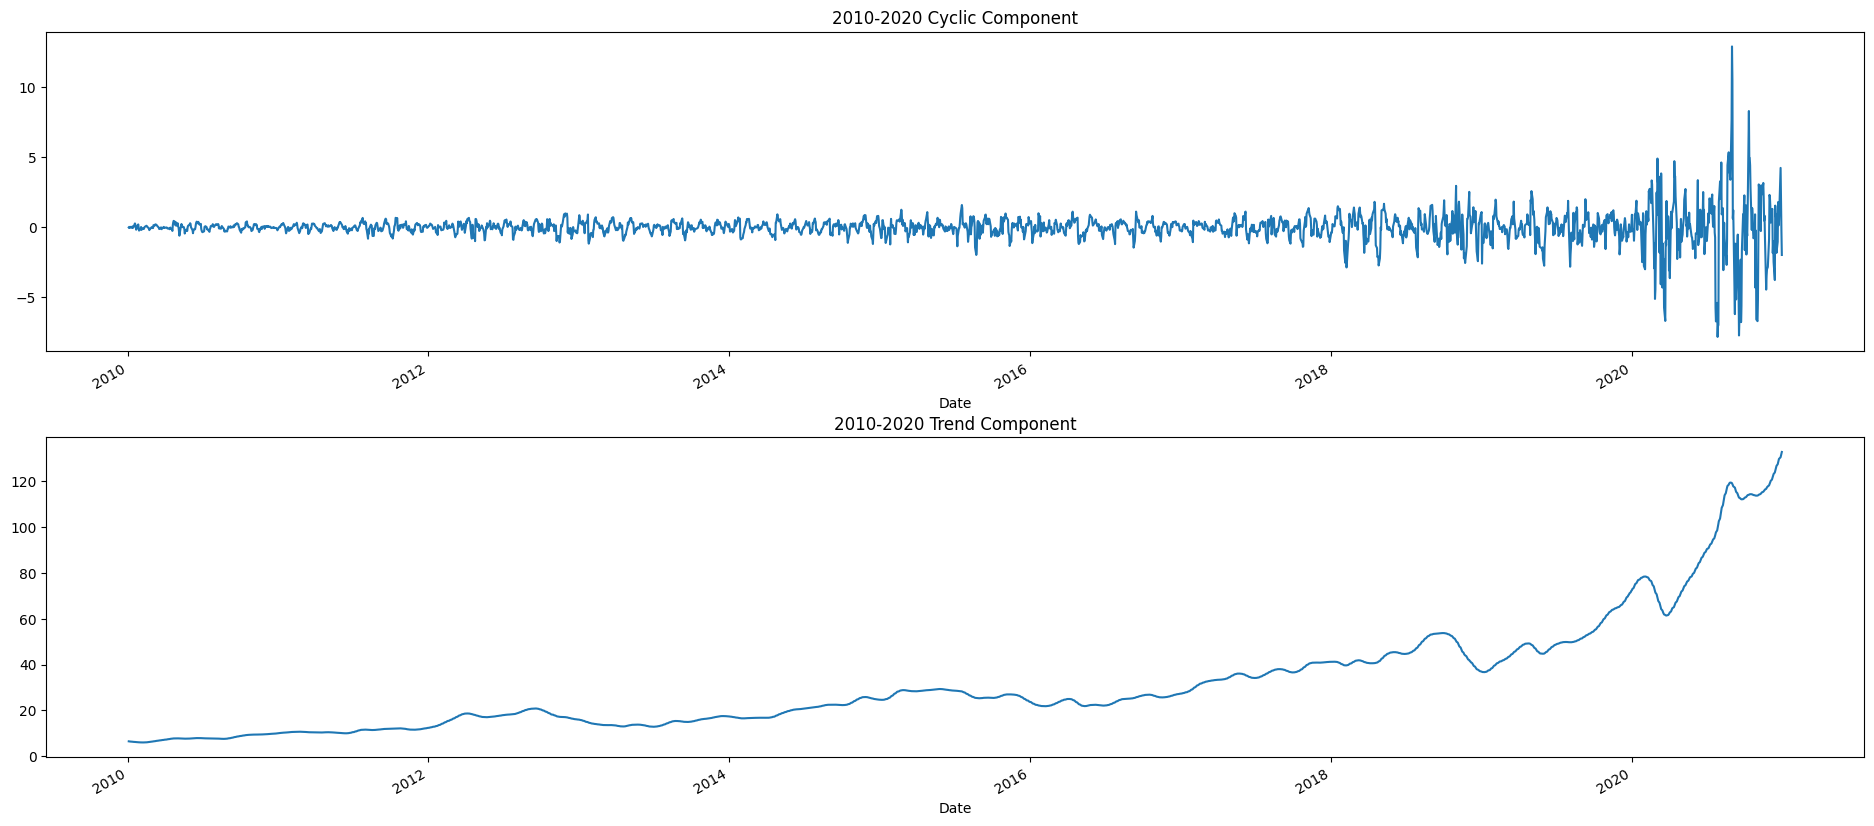

In [27]:
df_10_cyclic, df_10_trend = hpfilter(df_10)
fig,ax=plt.subplots(2,1,figsize=(20, 10))
fig.tight_layout(pad=5.0)
df_10_cyclic.plot(ax=ax[0],title='2010-2020 Cyclic Component')
df_10_trend.plot(ax=ax[1],title="2010-2020 Trend Component")
plt.show()

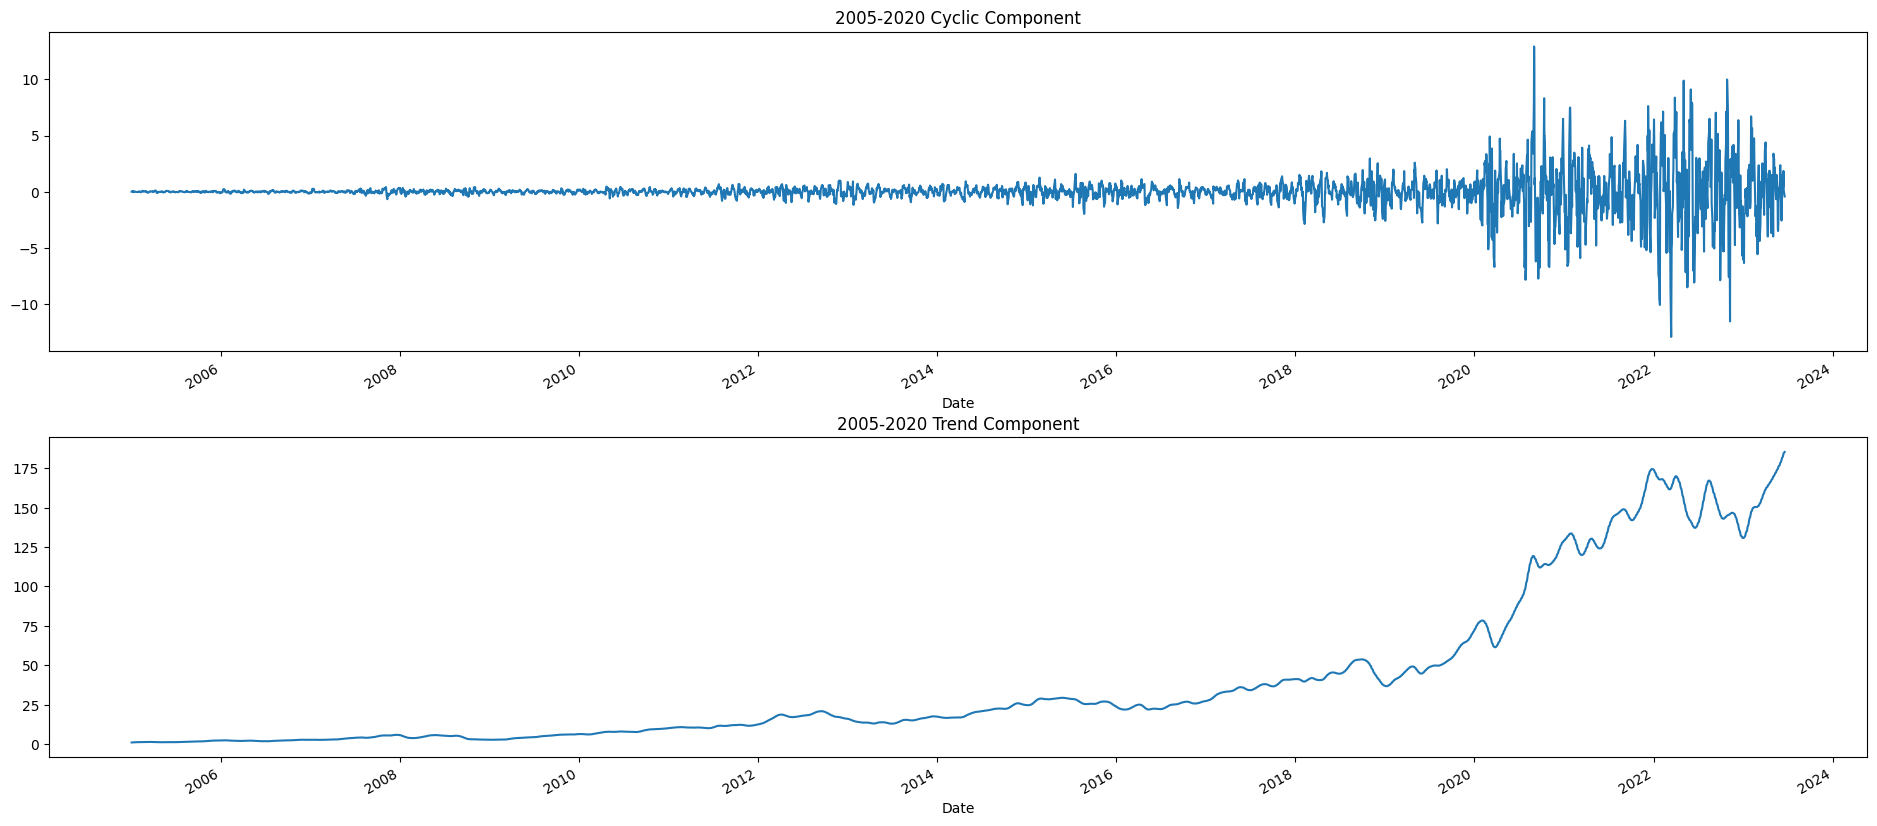

In [28]:
df_cyclic, df_trend = hpfilter(df)
fig,ax=plt.subplots(2,1,figsize=(20, 10))
fig.tight_layout(pad=5.0)
df_cyclic.plot(ax=ax[0],title='2005-2020 Cyclic Component')
df_trend.plot(ax=ax[1],title="2005-2020 Trend Component")
plt.show()

## Check for Stationarity

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.datasets import co2
import warnings

In [30]:
df

,Adj Close
Date,
2005-01-03,0.960588
2005-01-04,0.970453
2005-01-05,0.978952
2005-01-06,0.979712
2005-01-07,1.051045
...,...
2023-06-13,183.309998
2023-06-14,183.949997
2023-06-15,186.009995


In [31]:
n = df.shape[0]
lags = int(12*(n/100)**(0.25))

In [32]:
# use this instead 
def print_results(output, test='adf'):
    
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'
            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test)

In [33]:
adf_output = adfuller(df)
kpss_output = kpss(df)

C:\Users\dell\AppData\Local\Temp\ipykernel_21884\1012672925.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df)


In [34]:
adf_output

(1.9522196785025312,
 0.9986075538395188,
 30,
 4616,
 {'1%': -3.431767448052371,
  '5%': -2.8621663472971237,
  '10%': -2.567103407395045},
 14795.066416044974)

In [35]:
kpss_output

(8.084873951304871,
 0.01,
 41,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [36]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,1.95222,8.084874
p-value,0.998608,0.01
Numbers of lags,30,41
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.431767,0.739
Critical Value (5%),-2.862166,0.463
Critical Value (10%),-2.567103,0.347
Critical Value (2.5%),NaN,0.574


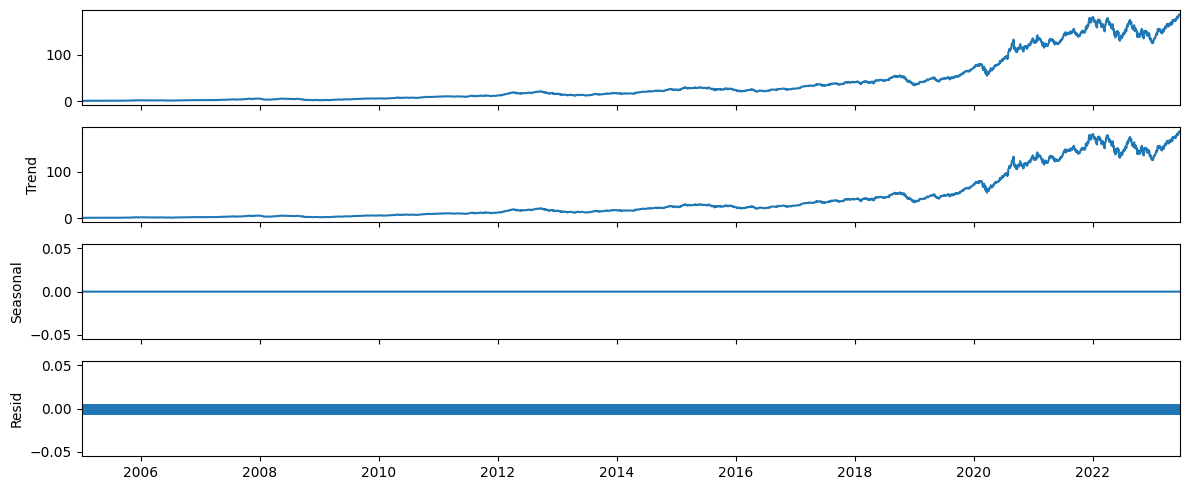

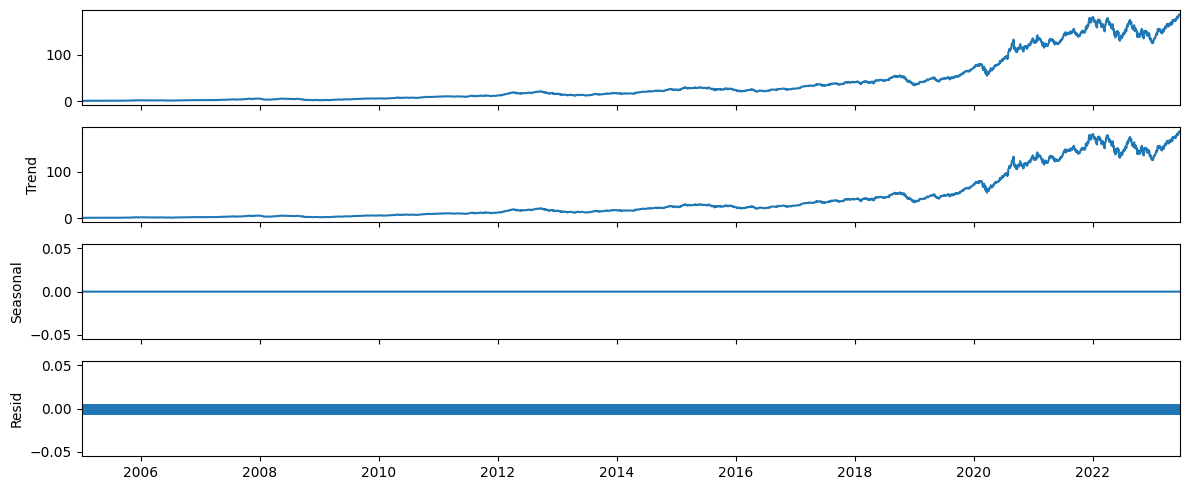

In [37]:
df_decomposed = seasonal_decompose(df,model='additive',period=1)
df_decomposed.plot()

<Axes: xlabel='Date'>

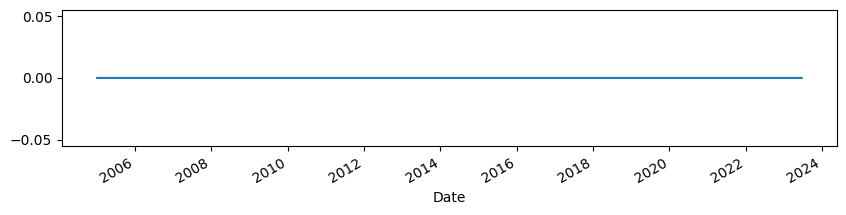

In [38]:
df_Residue=df_decomposed.resid
df_Residue.plot(figsize=(10,2))

In [39]:
df_Residue=pd.DataFrame(df_Residue)
adf_output = adfuller(df_Residue)
kpss_output = kpss(df_Residue)

ValueError: Invalid input, x is constant

We can not apply the ADF and KPSS tests on the residual obtained from the decomposition because it is constant dataframe 

In [40]:
def check_stationarity(df):
    kps = kpss(df)
    adf = adfuller(df)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Stationary', 'Non-stationary'
    
    if adf_pv < 0.05:
        # Reject ADF Null Hypothesis
        adfh = 'Stationary'
    if kpss_pv < 0.05:
        # Reject KPSS Null Hypothesis
        kpssh = 'Non Stationary'
    return (kpssh, adfh)

In [41]:
check_stationarity(df)

C:\Users\dell\AppData\Local\Temp\ipykernel_21884\1202941885.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(df)


('Non Stationary', 'Non-stationary')

In [42]:
def plot_comparison(methods, plot_type='line'):
    n = len(methods) // 2
    fig, ax = plt.subplots(n,2, sharex=True, figsize=(20,10))
    for i, method in enumerate(methods):
        method.dropna(inplace=True)
        name = [n for n in globals() if globals()[n] is method]
        v, r = i // 2, i % 2

        kpss_s, adf_s = check_stationarity(method)

        method.plot(kind=plot_type, 
                    ax=ax[v,r], 
                    legend=False, 
                    title=f'{name[0].upper()} KPSS={kpss_s}, ADF={adf_s}')
        ax[v,r].title.set_size(14)
        method.rolling(52).mean().plot(ax=ax[v,r], legend=False)
        

## Make the Series Stationary

**For original dataset**

In [43]:
# using first order differencing (detrending)
first_ord_diff = df.diff().dropna()

In [44]:
# using second order differencing
second_ord_diff = df.diff().diff().dropna()

In [45]:
# differencing to remove seasonality
diseasonalize = df.diff(52).dropna()

In [46]:
# using rolling mean 
rolling_mean = df.rolling(window=52).mean()
subt_roll_mean = df - rolling_mean

In [47]:
# log transform
log_transform = np.log(df)

In [48]:
# Square root transform
square_root = np.sqrt(df)

In [49]:
# using seasonal_decompose to remove trend
decomp = seasonal_decompose(df,period=2)
sd_detrend = (decomp.observed - decomp.trend)


In [50]:
# using hp_filter 
cyclic_extract, trend = hpfilter(df)

In [51]:
# combine the methods into a list
methods = [first_ord_diff, second_ord_diff, 
           diseasonalize, subt_roll_mean, 
           log_transform, square_root,
            cyclic_extract,sd_detrend]

In [52]:
plt.rcParams["figure.figsize"] = [12, 5]

C:\Users\dell\AppData\Local\Temp\ipykernel_21884\1202941885.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(df)
C:\Users\dell\AppData\Local\Temp\ipykernel_21884\1202941885.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(df)
C:\Users\dell\AppData\Local\Temp\ipykernel_21884\1202941885.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(df)
C:\Users\dell\AppData\Local\Temp\ipykernel_21884\1202941885.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(df)


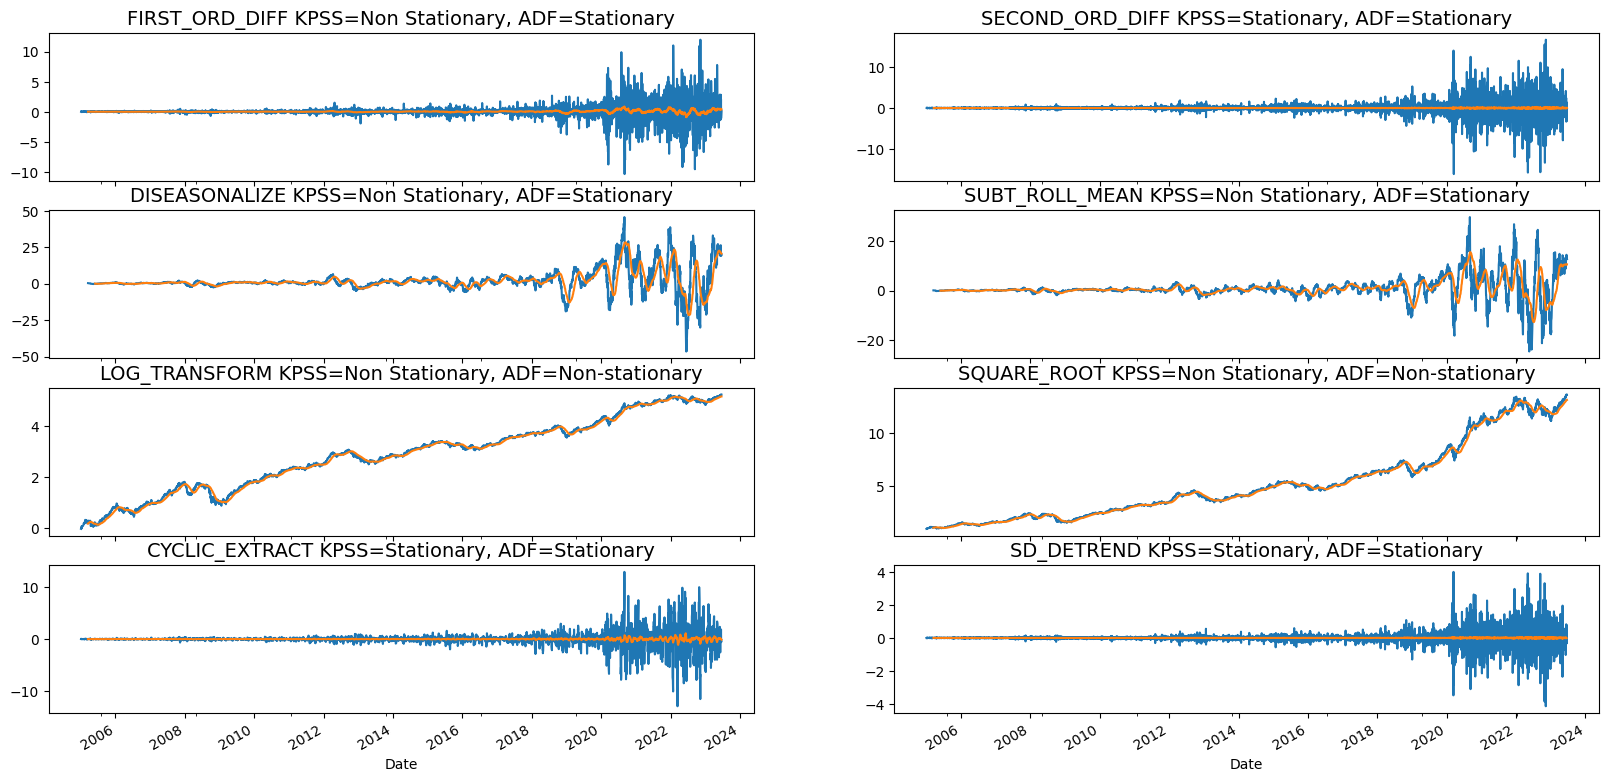

In [53]:
plot = plot_comparison(methods)
warnings.simplefilter('ignore')
warnings.simplefilter('ignore')

In [54]:

def Resuls(methods):
   
    adf_output = adfuller(methods[0])
    kpss_output = kpss(methods[0])
    result=pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
    ], axis=1)

    for i in methods[1:]:
        adf_output = adfuller(i)
        kpss_output = kpss(i)
        
        temp=pd.concat([
        print_results(adf_output, 'adf'),
        print_results(kpss_output, 'kpss')
        ], axis=1)
        result=pd.concat([result,temp], axis=1)
    result.columns= col=["first_ord_diff adf","first_ord_diff kpss", "second_ord_diff adf", "second_ord_diff kpss",
           "diseasonalize adf","diseasonalize kpss", "subt_roll_mean adf", "subt_roll_mean kpss",
           "log_transform adf", "log_transform kpss","square_root adf","square_root kpss",
            "cyclic_extract adf", "cyclic_extract kpss","sd_detrend adf","sd_detrend kpss"]
    return result
    


In [55]:
df_results=Resuls(methods)

In [56]:
df_results

,first_ord_diff adf,first_ord_diff kpss,second_ord_diff adf,second_ord_diff kpss,diseasonalize adf,diseasonalize kpss,subt_roll_mean adf,subt_roll_mean kpss,log_transform adf,log_transform kpss,square_root adf,square_root kpss,cyclic_extract adf,cyclic_extract kpss,sd_detrend adf,sd_detrend kpss
Test Statistic,-12.854973,0.63418,-19.552034,0.018464,-7.94386,1.025653,-9.547993,0.897598,-1.067608,10.687693,1.228306,9.831121,-21.00386,0.001695,-19.552034,0.018464
p-value,0.0,0.019529,0.0,0.1,0.0,0.01,0.0,0.01,0.727815,0.01,0.996176,0.01,0.0,0.1,0.0,0.1
Numbers of lags,29,5,32,166,31,40,30,40,16,41,22,41,32,20,32,166
decision,Stationary,Non-Stationary,Stationary,Stationary,Stationary,Non-Stationary,Stationary,Non-Stationary,Non-Stationary,Non-Stationary,Non-Stationary,Non-Stationary,Stationary,Stationary,Stationary,Stationary
Critical Value (1%),-3.431767,0.739,-3.431769,0.739,-3.431784,0.739,-3.431783,0.739,-3.431763,0.739,-3.431765,0.739,-3.431768,0.739,-3.431769,0.739
Critical Value (5%),-2.862166,0.463,-2.862167,0.463,-2.862174,0.463,-2.862173,0.463,-2.862164,0.463,-2.862165,0.463,-2.862167,0.463,-2.862167,0.463
Critical Value (10%),-2.567103,0.347,-2.567104,0.347,-2.567107,0.347,-2.567107,0.347,-2.567102,0.347,-2.567103,0.347,-2.567104,0.347,-2.567104,0.347
Critical Value (2.5%),NaN,0.574,NaN,0.574,NaN,0.574,NaN,0.574,NaN,0.574,NaN,0.574,NaN,0.574,NaN,0.574


**From this data and above plot second_ord_diff and sd_detrend are seemed to be best We chose second_ord_diff for further analysis**

In [57]:
second_ord_diff

,Adj Close
Date,
2005-01-05,-0.001367
2005-01-06,-0.007739
2005-01-07,0.070573
2005-01-10,-0.075734
2005-01-11,-0.062381
...,...
2023-06-13,-3.309982
2023-06-14,1.119995
2023-06-15,1.419998


<Axes: xlabel='Date'>

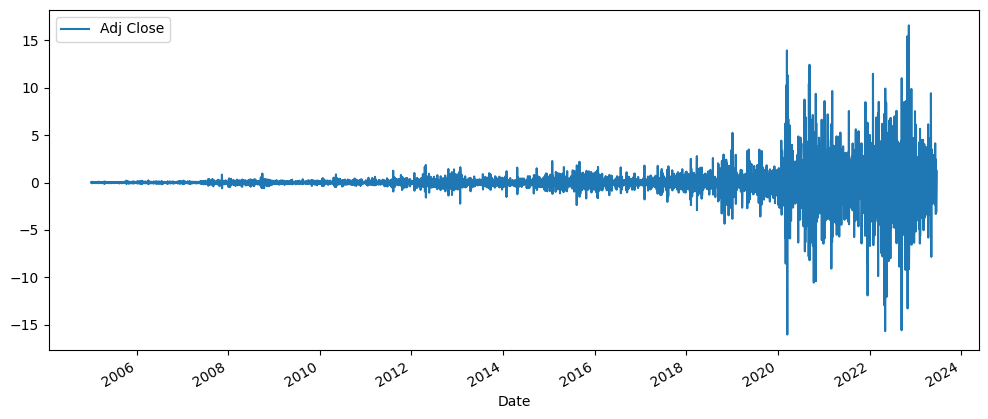

In [58]:
second_ord_diff.plot()

<Axes: xlabel='Date'>

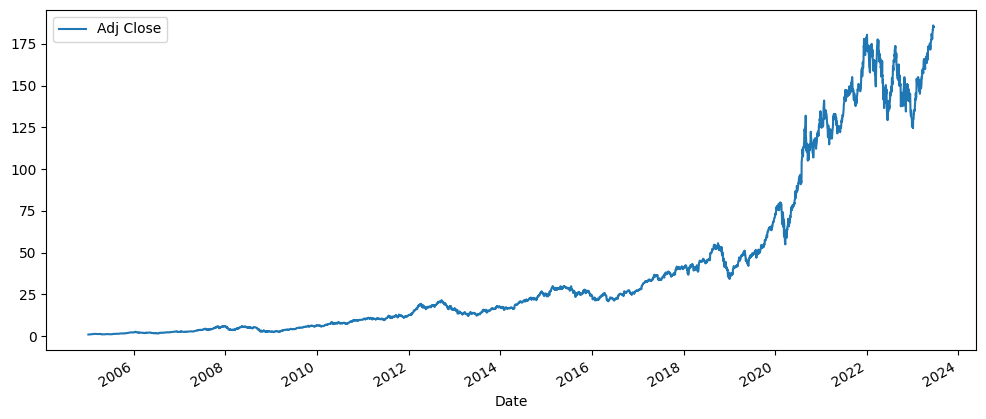

In [59]:
df.plot()

## Test for Normality

In [60]:
from scipy.stats import shapiro

In [61]:
def is_normal(test, p_level=0.05):
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

In [62]:
is_normal(shapiro(df))

'Not Normal'

In [63]:
is_normal(shapiro(second_ord_diff))

'Not Normal'

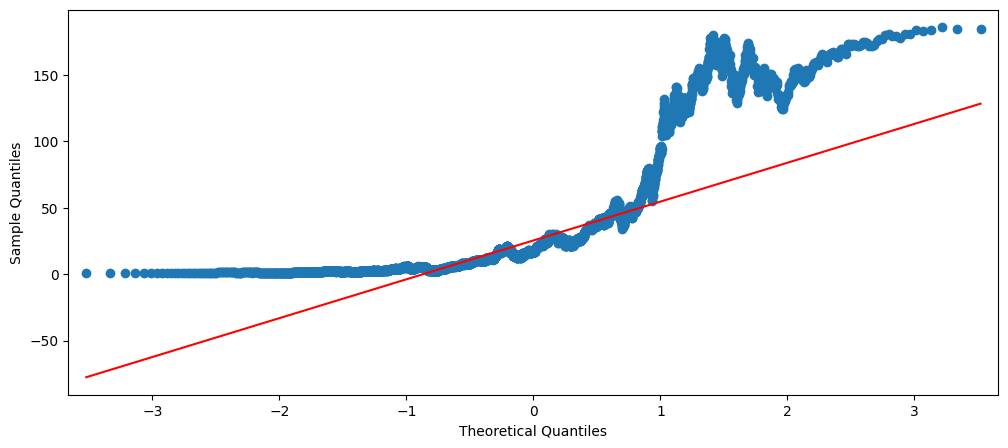

In [64]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df, line='q');

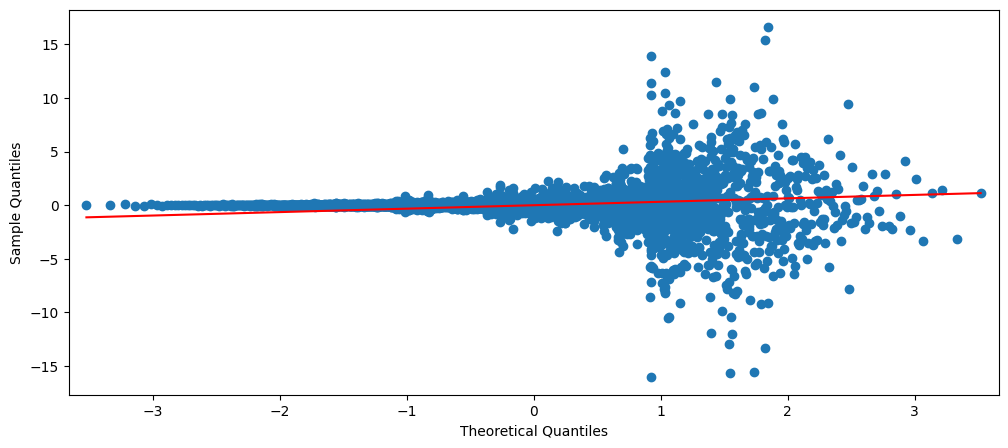

In [65]:
qqplot(second_ord_diff, line='q');

**As we can see that original dataframe is deviated from y=x line but second_ord_diff is approximately lies on y=x line, hence follows normal distribution**

## Test for Homoscedasticity and Apply Box-Cox Transformation

In [66]:
# from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(second_ord_diff, lags=1, trend='n').fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 4645
Model:                     AutoReg(1)   Log Likelihood               -8503.704
Method:               Conditional MLE   S.D. of innovations              1.510
Date:                Wed, 21 Jun 2023   AIC                          17011.407
Time:                        10:34:07   BIC                          17024.294
Sample:                             1   HQIC                         17015.941
                                 4645                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Adj Close.L1    -0.5098      0.013    -40.380      0.000      -0.535      -0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9616           +0.0000j            1.9616            0.5000
-----------------------------------------------------------------------------
"""

In [68]:
is_normal(shapiro(model.resid))

'Not Normal'

(array([3.000e+00, 5.000e+00, 3.700e+01, 1.320e+02, 3.625e+03, 7.140e+02,
        9.400e+01, 2.500e+01, 6.000e+00, 3.000e+00]),
 array([-13.9801813 , -11.11938367,  -8.25858605,  -5.39778842,
         -2.5369908 ,   0.32380683,   3.18460445,   6.04540208,
          8.9061997 ,  11.76699733,  14.62779495]),
 <BarContainer object of 10 artists>)

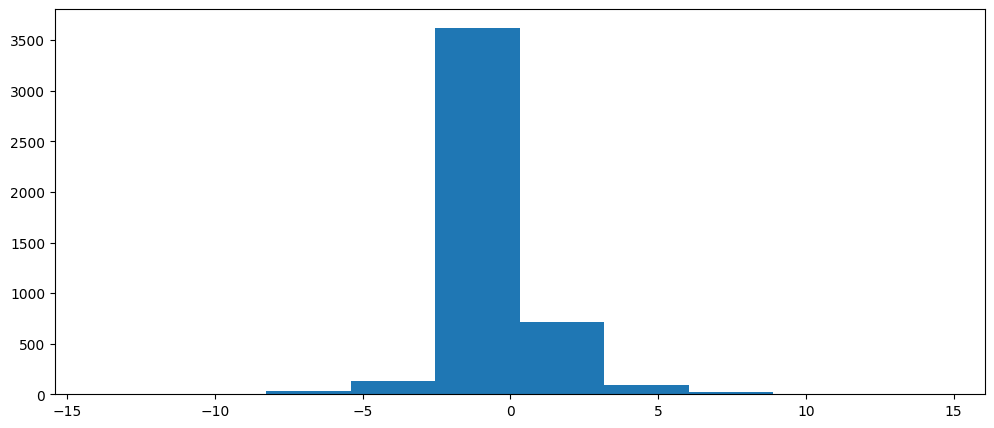

In [69]:
plt.hist(model.resid)

In [70]:
model.resid.mean()

-0.00010318826452875017

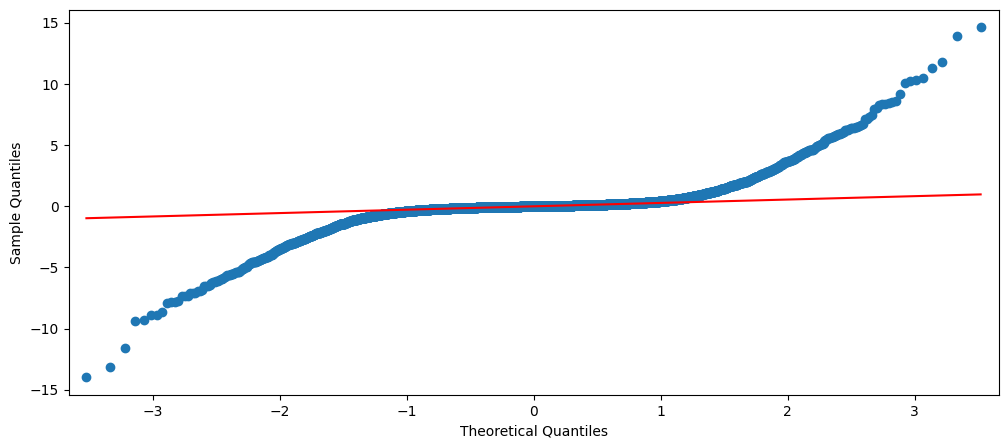

In [71]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='q');

In [72]:
model.test_heteroskedasticity()

,ARCH-LM,P-value,DF
Lag,,,
1,360.446999,2.250357e-80,1
2,635.341504,1.089796e-138,2
3,695.327598,2.163658e-150,3
4,750.834660,3.419754e-161,4
5,793.282853,3.284123e-169,5
6,838.669272,6.783352e-178,6
7,853.893467,4.328049e-180,7
8,869.490980,2.147766e-182,8
9,1016.880038,3.949063e-213,9


In [73]:
from statsmodels.stats.api import (het_breuschpagan, 
                                   het_white)

In [74]:
model.resid

Date
2005-01-06   -0.008436
2005-01-07    0.066628
2005-01-10   -0.039756
2005-01-11   -0.100989
2005-01-12    0.048640
                ...   
2023-06-13   -2.066089
2023-06-14   -0.567417
2023-06-15    1.990966
2023-06-16   -2.426086
2023-06-20   -0.425858
Length: 4644, dtype: float64

In [75]:
print(model.fittedvalues.shape)
model.resid.shape

(4644,)


(4644,)

In [76]:
model.fittedvalues

Date
2005-01-06    0.000697
2005-01-07    0.003945
2005-01-10   -0.035978
2005-01-11    0.038609
2005-01-12    0.031801
                ...   
2023-06-13   -1.243893
2023-06-14    1.687412
2023-06-15   -0.570968
2023-06-16   -0.723908
2023-06-20    1.605851
Length: 4644, dtype: float64

In [77]:
from statsmodels.tools.tools import add_constant

In [78]:
def het_test(model, test=het_breuschpagan):
    lm, lm_pvalue, fvalue, f_pvalue = (
        het_breuschpagan(model.resid, 
                         add_constant(
                             model.fittedvalues)
                        ))
    
    return "Heteroskedastic" if f_pvalue < 0.05 else "Homoskedastic"

In [79]:
het_test(model, test=het_breuschpagan)

'Homoskedastic'

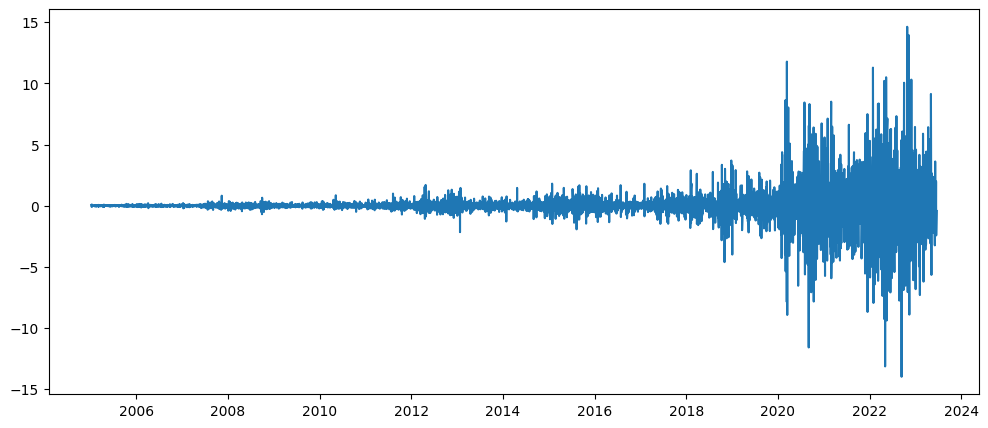

In [80]:
plt.plot(model.resid[1:])

In [81]:
from scipy.stats import boxcox

In [82]:
second_ord_diff

,Adj Close
Date,
2005-01-05,-0.001367
2005-01-06,-0.007739
2005-01-07,0.070573
2005-01-10,-0.075734
2005-01-11,-0.062381
...,...
2023-06-13,-3.309982
2023-06-14,1.119995
2023-06-15,1.419998


In [83]:
xt, lmbda = boxcox(df['Adj Close'])

In [84]:
xt

array([-0.04017449, -0.02997244, -0.021263  , ...,  5.87739326,
        5.86999298,  5.87060556])

In [85]:
lmbda

0.0441237715704596

In [86]:
xts = pd.Series(xt, index=df.index)

In [87]:
xts

Date
2005-01-03   -0.040174
2005-01-04   -0.029972
2005-01-05   -0.021263
2005-01-06   -0.020488
2005-01-07    0.049840
                ...   
2023-06-13    5.858986
2023-06-14    5.863372
2023-06-15    5.877393
2023-06-16    5.869993
2023-06-20    5.870606
Length: 4647, dtype: float64

Text(0.5, 1.0, 'Box-Cox Transformed')

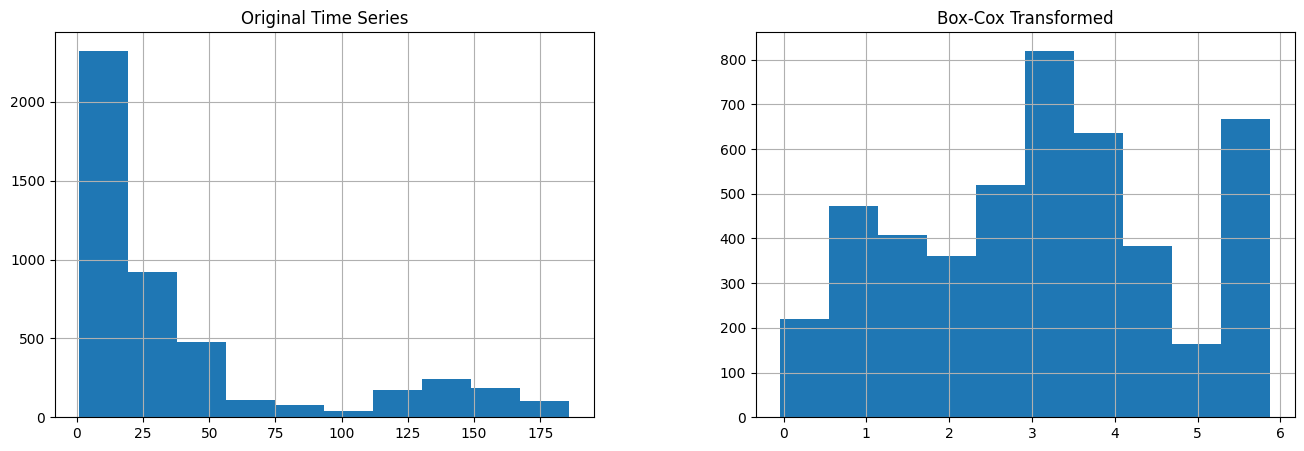

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
df.hist(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.hist(ax=ax[1])
ax[1].set_title('Box-Cox Transformed')

Text(0.5, 1.0, 'Box-Cox Transformed')

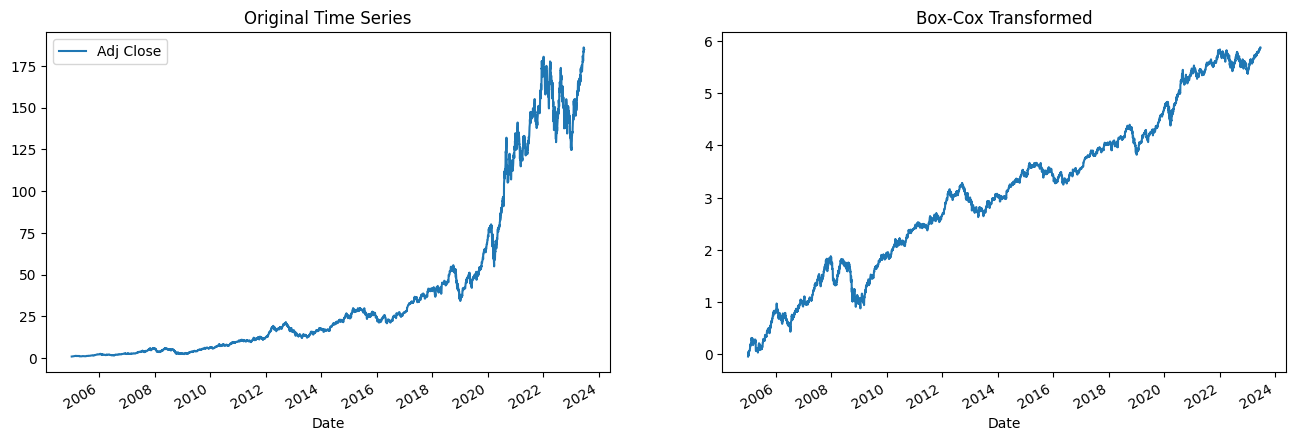

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
df.plot(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.plot(ax=ax[1])
ax[1].set_title('Box-Cox Transformed')
#plt.savefig('images/fig_9.24.png', bbox_inches='tight')

## Fit a Simple Autoregressive Model

In [90]:
model_dfp = AutoReg(second_ord_diff, lags=1, trend='n').fit()
model_bx = AutoReg(xts, lags=1, trend='n').fit()

Text(0.5, 1.0, 'Residual Plot - Box-Cox Transformed')

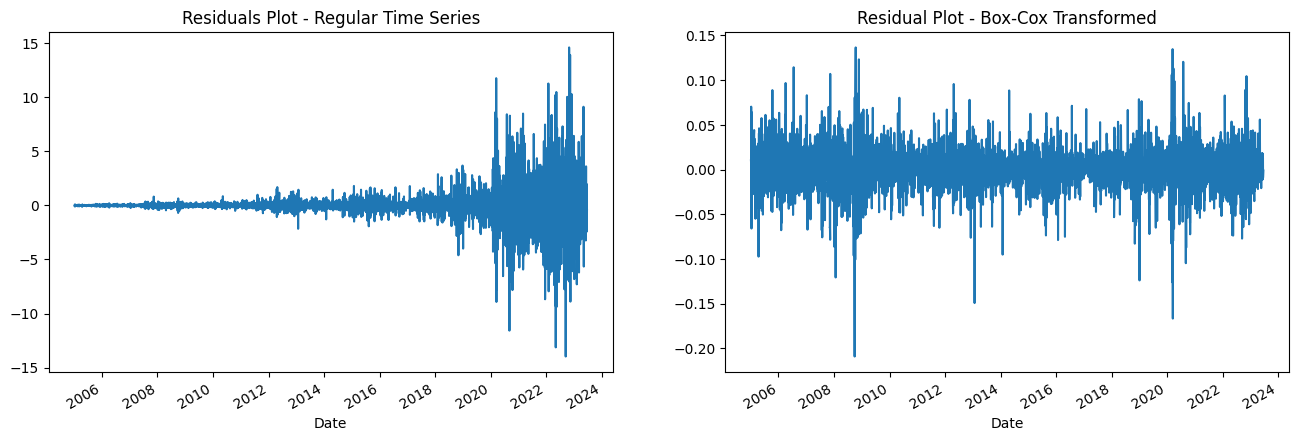

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
model_dfp.resid.plot(ax=ax[0])
ax[0].set_title('Residuals Plot - Regular Time Series')
model_bx.resid.plot(ax=ax[1])
ax[1].set_title('Residual Plot - Box-Cox Transformed')
#plt.savefig('images/fig_9.25.png', bbox_inches='tight')

In [92]:
print(model_bx.diagnostic_summary())

             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
   5480.437      0.000     -0.255      8.296


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1    200.030      0.000          1
         2    272.690      0.000          2
         3    312.213      0.000          3
         4    339.910      0.000          4
         5    381.241      0.000          5
         6    452.181      0.000          6
         7    458.467      0.000          7
         8    480.367      0.000          8
         9    492.879      0.000          9
        10    556.662      0.000         10
-------------------------------------------


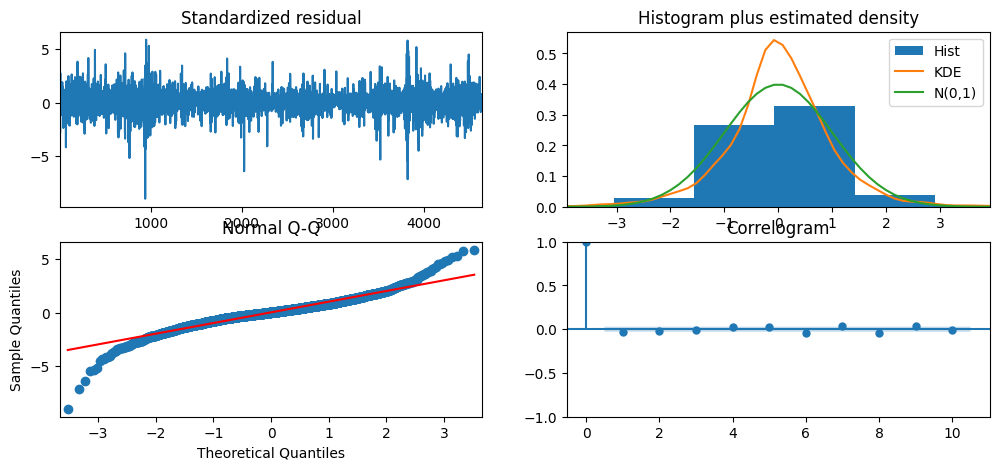

In [93]:
plot = model_bx.plot_diagnostics()


In [126]:
from datetime import datetime

In [129]:
train_end=pd.to_datetime("31-12-2022")
test_end=pd.to_datetime("2023-06-16")

In [114]:
df_transformed=pd.DataFrame(xts)
df_transformed.columns=["Ajd Close"]

In [115]:
train_data=df_transformed[:"31-12-2022"]

In [116]:
test_data=df_transformed['2023-01-03':]

In [117]:
train_data.index


DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=4531, freq=None)

<Axes: xlabel='Date'>

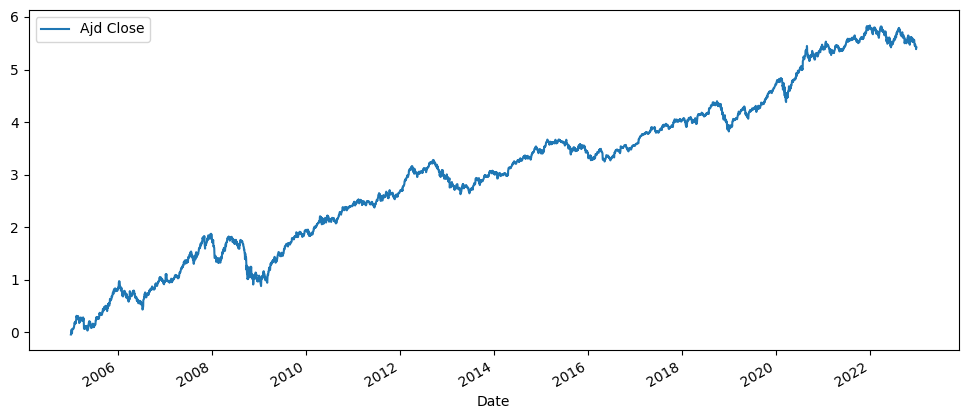

In [118]:
train_data.plot()

In [119]:
test_data.index

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
               '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
               '2023-06-16', '2023-06-20'],
              dtype='datetime64[ns]', name='Date', length=116, freq=None)

In [120]:
model = AutoReg(train_data, lags=1, trend='n').fit()

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              Ajd Close   No. Observations:                 4531
Model:                     AutoReg(1)   Log Likelihood               10586.759
Method:               Conditional MLE   S.D. of innovations              0.023
Date:                Wed, 21 Jun 2023   AIC                         -21169.519
Time:                        10:34:17   BIC                         -21156.682
Sample:                             1   HQIC                        -21164.997
                                 4531                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Ajd Close.L1     1.0003      0.000   9787.842      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9997           +0.0000j            0.9997            0.0000
-----------------------------------------------------------------------------
"""

In [121]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [122]:
pred_end_date

Timestamp('2023-06-20 00:00:00')

In [123]:
pred_start_date

Timestamp('2023-01-03 00:00:00')

In [125]:
model.predict(start=pred_start_date,end=pred_end_date)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

## Plot ACF/PACF


In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

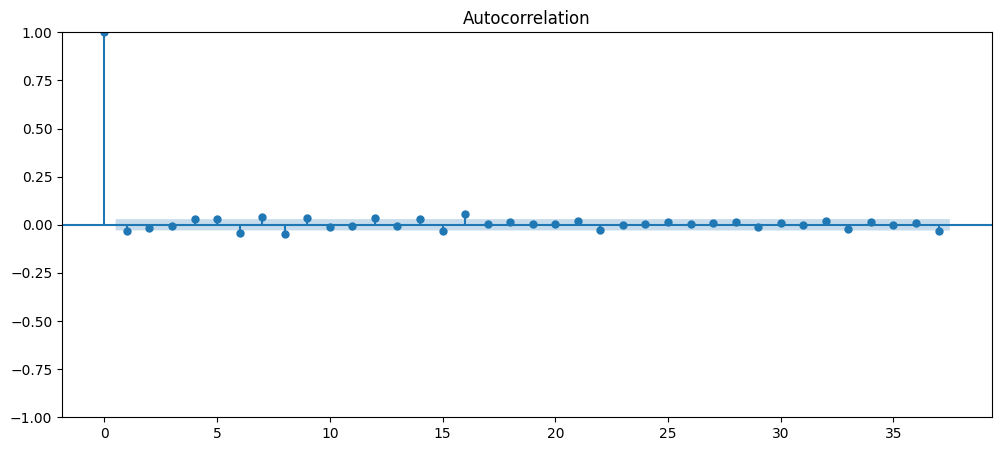

In [134]:
plot_acf(model.resid);plt.show()

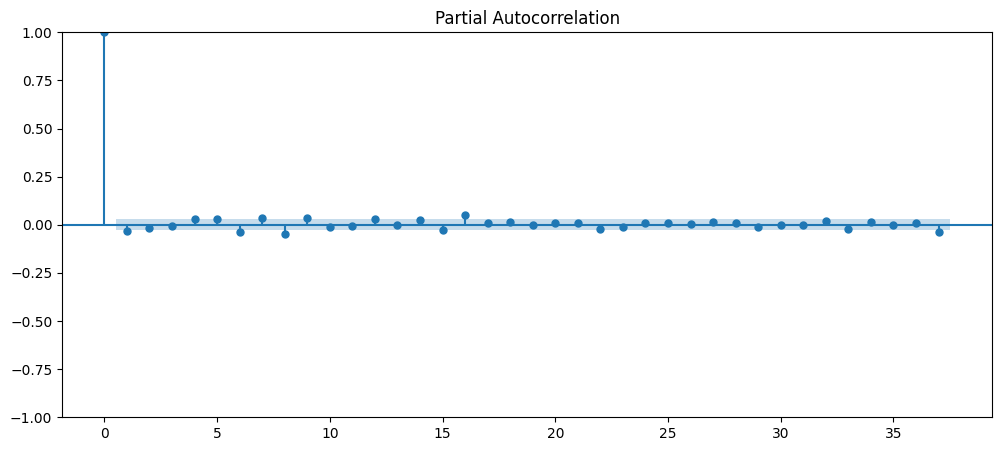

In [135]:
plot_pacf(model.resid);plt.show()